# TEST JGV package
** This notebook contains tests for all function contained in JGV package **

In [1]:
# For ipython inline ploting ploting
%matplotlib inline

# Larger display 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Import of required packages
import pandas as pd
import pylab as pl

# Import functions from JGV
from JGV_helper_fun import *
from Reference import *
from Annotation import *
from Alignment import *
from Level import *

### Folder setup and download test files

In [1]:
print ("Create directory for the test dataset files")
!mkdir -p "../dl_test_data/"

Create directory for the test dataset files


In [4]:
print ("Download reference human genome from Gencode")
!wget "ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/GRCh38.primary_assembly.genome.fa.gz" -O "../dl_test_data/GRCh38_primary.fa.gz"

Download reference human genome from Gencode
--2017-02-06 15:41:16--  ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/GRCh38.primary_assembly.genome.fa.gz
           => ‘../dowloaded_test_data/GRCh38_primary.fa.gz’
Resolving ftp.sanger.ac.uk (ftp.sanger.ac.uk)... 193.62.203.17
Connecting to ftp.sanger.ac.uk (ftp.sanger.ac.uk)|193.62.203.17|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/gencode/Gencode_human/release_25 ... done.
==> SIZE GRCh38.primary_assembly.genome.fa.gz ... 844691642
==> PASV ... done.    ==> RETR GRCh38.primary_assembly.genome.fa.gz ... done.
Length: 844691642 (806M) (unauthoritative)

GRCh38.primary_asse 100%[===================>] 805.56M  6.55MB/s    in 2m 9s   

2017-02-06 15:43:26 (6.25 MB/s) - ‘../dowloaded_test_data/GRCh38_primary.fa.gz’ saved [844691642]



In [5]:
print ("Download reference gencode v25 human genome annotation")
!wget "ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/gencode.v25.primary_assembly.annotation.gff3.gz" -O "../dl_test_data/gencode_v25_primary.gff3.gz"

Download reference gencode v25 human genome annotation
--2017-02-06 15:43:26--  ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/gencode.v25.primary_assembly.annotation.gff3.gz
           => ‘../dowloaded_test_data/gencode_v25_primary.gff3.gz’
Resolving ftp.sanger.ac.uk (ftp.sanger.ac.uk)... 193.62.203.17
Connecting to ftp.sanger.ac.uk (ftp.sanger.ac.uk)|193.62.203.17|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/gencode/Gencode_human/release_25 ... done.
==> SIZE gencode.v25.primary_assembly.annotation.gff3.gz ... 46752876
==> PASV ... done.    ==> RETR gencode.v25.primary_assembly.annotation.gff3.gz ... done.
Length: 46752876 (45M) (unauthoritative)

gencode.v25.primary 100%[===================>]  44.59M  5.66MB/s    in 7.7s    

2017-02-06 15:43:34 (5.80 MB/s) - ‘../dowloaded_test_data/gencode_v25_primary.gff3.gz’ saved [46752876]



In [6]:
print ("Download reference gencode v25 human genome annotation")
!wget "ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/gencode.v25.primary_assembly.annotation.gtf.gz" -O "../dl_test_data/gencode_v25_primary.gtf.gz"

Download reference gencode v25 human genome annotation
--2017-02-06 15:43:34--  ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/gencode.v25.primary_assembly.annotation.gtf.gz
           => ‘../dowloaded_test_data/gencode_v25_primary.gtf.gz’
Resolving ftp.sanger.ac.uk (ftp.sanger.ac.uk)... 193.62.203.17
Connecting to ftp.sanger.ac.uk (ftp.sanger.ac.uk)|193.62.203.17|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/gencode/Gencode_human/release_25 ... done.
==> SIZE gencode.v25.primary_assembly.annotation.gtf.gz ... 38827267
==> PASV ... done.    ==> RETR gencode.v25.primary_assembly.annotation.gtf.gz ... done.
Length: 38827267 (37M) (unauthoritative)

gencode.v25.primary 100%[===================>]  37.03M  6.21MB/s    in 6.5s    

2017-02-06 15:43:41 (5.71 MB/s) - ‘../dowloaded_test_data/gencode_v25_primary.gtf.gz’ saved [38827267]



In [7]:
print ("Download reference gencode v25 human genome annotation")
!wget "http://www.noncode.org/datadownload/NONCODE2016_human_hg38_lncRNA.gtf.gz" -O "../dl_test_data/NONCODE2016_human_hg38_lncRNA.gtf.gz"

Download reference gencode v25 human genome annotation
--2017-02-06 15:43:41--  http://www.noncode.org/datadownload/NONCODE2016_human_hg38_lncRNA.gtf.gz
Resolving www.noncode.org (www.noncode.org)... 112.124.13.146
Connecting to www.noncode.org (www.noncode.org)|112.124.13.146|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8248713 (7.9M) [application/x-gzip]
Saving to: ‘../dowloaded_test_data/NONCODE2016_human_hg38_lncRNA.gtf.gz’

../dowloaded_test_d 100%[===================>]   7.87M   757KB/s    in 18s     

2017-02-06 15:43:59 (457 KB/s) - ‘../dowloaded_test_data/NONCODE2016_human_hg38_lncRNA.gtf.gz’ saved [8248713/8248713]



In [35]:
print ("Download example bam file")
!wget -v "http://www.ebi.ac.uk/~aleg/data/share/1M.bam" -O "../dl_test_data/1M.bam"

Download example bam file
--2017-02-06 17:18:29--  http://www.ebi.ac.uk/~aleg/data/share/1M.bam
Resolving www.ebi.ac.uk (www.ebi.ac.uk)... 193.62.193.80
Connecting to www.ebi.ac.uk (www.ebi.ac.uk)|193.62.193.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98262031 (94M) [text/plain]
Saving to: ‘../dl_test_data/1M.bam’

../dl_test_data/1M. 100%[===================>]  93.71M  6.55MB/s    in 15s     

2017-02-06 17:18:43 (6.42 MB/s) - ‘../dl_test_data/1M.bam’ saved [98262031/98262031]



---

# JGV_helper_fun

## extensions

In [9]:
help (extensions)

Help on function extensions in module JGV_helper_fun:

extensions(fp)
    Return the extension of a file in lower-case.
    If the file is gziped the method will output the base extension + the archive extension



In [3]:
extensions("./JGV_Test_Notebook.ipynb")

['ipynb']

In [4]:
extensions("../test_data/GRCh38_primary.fa.gz")

['fa', 'gz']

In [5]:
extensions("../test_data/GRCh38_primary")

[]

## file_basename

In [8]:
help(file_basename)

Help on function file_basename in module JGV_helper_fun:

file_basename(fp)
    Return the base name of a file without extension nor path.
    If the file is gziped the method will output the name without extension + the archive extension



In [12]:
file_basename("./Annotation.py")

'Annotation'

In [15]:
file_basename("../test_data/10M_sample.bam")

'10M_sample'

In [16]:
file_basename("../test_data/NONCODE2016_human_hg38_lncRNA_sorted.gtf.gz")

'NONCODE2016_human_hg38_lncRNA_sorted'

## dir_path

In [7]:
help(dir_path)

Help on function dir_path in module JGV_helper_fun:

dir_path(fp)
    Return the directory path of a file



In [6]:
dir_path("../test_data/NONCODE2016_human_hg38_lncRNA_sorted.gtf.gz")

'../test_data'

In [18]:
dir_path("./JGV.py")

'.'

## color_palette

In [10]:
help(color_palette)

Help on function color_palette in module JGV_helper_fun:

color_palette(n, colormap='brg')
    Return a list of n length with gradient colors from a given matplot lib colormap palette
    * n         Number of color scalar in the list
    * colormap  colormap color palette from matplotlib package.
                See http://matplotlib.org/examples/color/colormaps_reference.html
                example : inferno magma hot blues cool spring winter brg ocean hsv jet ... [DEFAULT: brg]



In [11]:
c= color_palette (n=10, colormap="viridis")
print(c)

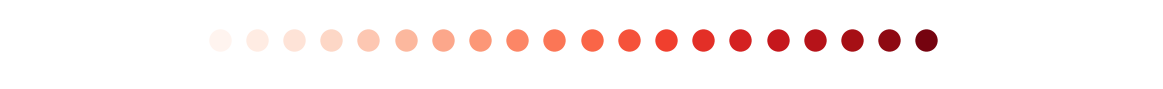

In [12]:
c= color_palette (n=20, colormap="Reds")
pl.figure(figsize=(20,1))
pl.axis("off")
for i, color in enumerate(c):
    pl.scatter(i, 1, c=color, linewidths=0, s=500)

## jprint

In [16]:
help(jprint)

Help on function jprint in module JGV_helper_fun:

jprint(*args, **kwargs)
    Format a string in HTML and print the output. Equivalent of print, but highly customizable
    Many options can be passed to the function.
    * args
        One or several objects that can be cast in str
    ** kwargs
        Formatting options to tweak the html rendering 
        Boolean options : bold, italic, highlight, underlined, striked, subscripted, superscripted
        String oprions: font, color, size, align, background_color



In [51]:
jprint("This", "Function", "is", "better than the default print", bold=True, font="Serif")

In [70]:
jprint("This <b>Function</b> is better\n than the default print", color="blue", align="center", size = 200)

# Reference

In [13]:
help(Reference)

Help on class Reference in module Reference:

class Reference(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, fp, name=None, verbose=False)
 |       * fp
 |          A fasta file containing the reference sequences OR an tab separated index file containing at least 2 columns
 |          with the seqid and the length in bases (like a .fa.fai file generated by samtools faidx).
 |          The fasta option will take more time as the file has to be parsed to get the seqid and length of sequences.
 |          A 2 column index tsv file will be automatically generated for latter usage as an index file.
 |          Both fasta and infex file can be gziped
 |      *  name
 |          Name of the data file that will be used as track name for plotting. If not given, will be deduced from fp
 |          file name
 |      * verbose
 |          If True, will print more information during initialisation and calls of all the object methods.
 |  
 |  __repr__(self)
 |      Return repr(s

**Test the instanciation of the Reference class from a fasta file**

In [14]:
r = Reference ("../test_data/ERCC.fa.gz")
print(r)

**Test the instanciation of the Reference class from the auto generated fasta index**

In [15]:
r = Reference ("../test_data/ERCC.tsv")
print(r)

**Test self methods** 

In [16]:
r.get_seqid_len("ERCC-00033")

2022

In [17]:
r.seq_list.head()

,length
seqid,
ERCC-00104,2022
ERCC-00033,2022
ERCC-00025,1994
ERCC-00116,1991
ERCC-00014,1957


# Level

In [2]:
help(Level)

Help on class Level in module Level:

class Level(builtins.object)
 |  Compute the level of a given feature on the Annotation track to avoid annotation overlaping
 |  
 |  Methods defined here:
 |  
 |  __call__(self, ID, start, end, strand)
 |      Compute the level of an annnotation feature based on the instance options and the other feautures previously
 |      analysed, to avoid overlapping. Iterative call of the function has to be done with annotation features sorted
 |      by start coordinates.
 |      * ID
 |          Name of the feature to fit in a level
 |      * start
 |          Start coordinate of the feature to fit in a level, on the positive strand
 |      * end
 |          End coordinate of the feature to fit in a level, on the positive strand
 |      * strand
 |          Strand of the feature. Can be + - or None
 |  
 |  __init__(self, max_depth=10, offset=10, filter_pos=False, filter_neg=False, filter_unstrand=True)
 |      Define general options for Level class
 |   

**Test instanciation**

In [11]:
l = Level (max_depth=3, offset=10, filter_pos=False, filter_neg=False, filter_unstrand=True)
print(l)

**Test object calling with various values of features**

All should be valid except 4 and 10 

In [12]:
print(l(ID="1", start=10, end=20, strand="+"))
print(l(ID="2", start=12, end=22, strand="+"))
print(l(ID="3", start=14, end=24, strand="+"))
print(l(ID="4", start=23, end=26, strand="+"))
print(l(ID="5", start=14, end=24, strand="-"))
print(l(ID="6", start=27, end=43, strand="-"))
print(l(ID="7", start=27, end=48, strand="-"))
print(l(ID="8", start=54, end=76, strand="-"))
print(l(ID="9", start=54, end=76, strand="+"))
print(l(ID="10", start=54, end=76, strand="."))

Visualize changes in object self variable after calling

In [13]:
print(l)

**Alternative instanciation**

All should be valid except 3,5,6,7 and 8 

In [17]:
l = Level (max_depth=2, offset=2, filter_pos=False, filter_neg=True, filter_unstrand=False)

print(l(ID="1", start=10, end=20, strand="+"))
print(l(ID="2", start=12, end=22, strand="+"))
print(l(ID="3", start=14, end=24, strand="+"))
print(l(ID="4", start=23, end=26, strand="+"))
print(l(ID="5", start=14, end=24, strand="-"))
print(l(ID="6", start=27, end=43, strand="-"))
print(l(ID="7", start=27, end=48, strand="-"))
print(l(ID="8", start=54, end=76, strand="-"))
print(l(ID="9", start=54, end=76, strand="."))
print(l(ID="10", start=54, end=76, strand="."))

**Try the object properties**

In [18]:
l.max_level

2

In [19]:
l.min_level

0

In [20]:
l.n_level

3

# Annotation

In [38]:
help(Annotation)

Help on class Annotation in module Annotation:

class Annotation(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, fp, name=None, verbose=False)
 |       * fp
 |          A standard gff3 file (http://www.ensembl.org/info/website/upload/gff3.html) or gtf
 |          (http://www.ensembl.org/info/website/upload/gff.html)containing features annotations. Could be uncompressed
 |          or archived in gz format. Ideally the file would be already indexed with tabix bgzip. If not the program
 |          will sort the features and index the file (can take time)
 |      *  name
 |          Name of the data file that will be used as track name for plotting. If not given, will be deduced from fp
 |          file name
 |      * verbose
 |          If True, will print more information during initialisation and calls of all the object methods.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      readable description of the object
 |  
 |  interval_featu